In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# Get our data ready !
# Import built in dataset from sciket learn.
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Note
` The link of the data set in skearn documentation` : [Sciket Learn California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# Create a data frame !!
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# add the target variable !!
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Datasets (`interpretation`)

1. MedInc median income in block group

2. HouseAge median house age in block group

3. AveRooms average number of rooms per household

4. AveBedrms average number of bedrooms per household

5. Population block group population

6. AveOccup average number of household members

7. Latitude block group latitude

8. Longitude block group longitude

---------------------------------------
**the target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).**

--
**Block groups usually have between `250 and 550` housing units , `(a block group typically has a population of 600 to 3,000 people).`**

--
**the average number of rooms and bedrooms in this dataset are provided per household.**


In [6]:
# Check if exist any missing values or categorical data .
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [7]:
housing_df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [12]:
# Create x features , y label (target variable)
x= housing_df.drop("target",axis=1)
y = housing["target"]

# Split our data into training sets and testing sets
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# choose the right estimator !! 
# Experimetnal !! 
from sklearn.linear_model import Ridge
model = Ridge()

# instantiate and fit the model on training sets
model.fit(x_train,y_train)

# Check the model score !!
model.score(x_test,y_test)

0.5758549611440126

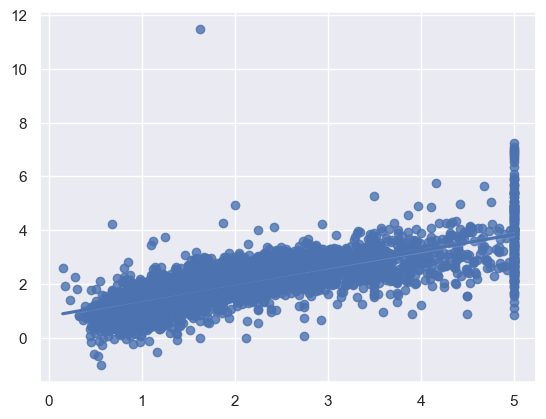

In [13]:
# Make predictions
y_preds = model.predict(x_test)
sns.regplot(x=y_test,y=y_preds);

In [9]:
# Choose another estimator !! 
from sklearn.svm import SVR 

# instantiate and fit the model on training sets
model = SVR()

model.fit(x_train,y_train)

# Check the model score on testing sets
model.score(x_test,y_test)

-0.01648536010717372

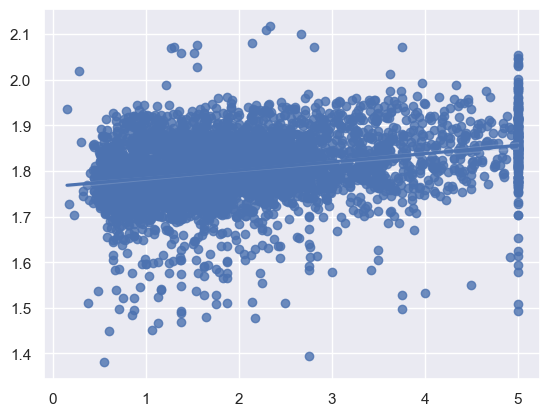

In [11]:
# Make predictions
y_preds = model.predict(x_test)
sns.regplot(x=y_test,y=y_preds);

In [14]:
# Choose another estimator (back to sciket learn map)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# instantiate and fit the model on training sets
model.fit(x_train,y_train)

# Check the score of the model on testing sets
model.score(x_test,y_test)



0.8078513724240605

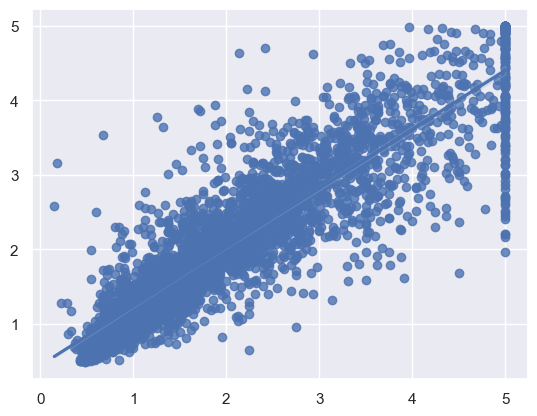

In [15]:
# make predictions
y_preds = model.predict(x_test)
sns.regplot(x=y_test,y=y_preds);


## Evaluation the model 
1. MAE (Mean Absolute Error)
2. MSE (Mean Squared Error)
3. RMSE (Root Mean Squared Error)
4. R2 Score (R Squared)

#### Note
`if you found any dificulty to grasp the evaluation metrics for regression take a glmpse on our guided presentation` [California Housing Presentation](https://github.com/khaledshakerrr/california-housing-price-prediction/blob/main/California%20Housing%20%20Guided.PDF)


In [16]:
# MAE 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32571103357558157

In [20]:
# MAE Interpretation
df = pd.DataFrame({"Actual Values":y_test,"Predicted Values":y_preds})
df.head()

,Actual Values,Predicted Values
0,0.47700,0.487340
1,0.45800,0.726440
2,5.00001,4.740287
3,2.18600,2.545370
4,2.78000,2.306570


In [21]:
# Add diference between actual values and predictions values
df["Difference"] = df["Actual Values"] - df["Predicted Values"]
df.head()

,Actual Values,Predicted Values,Difference
0,0.47700,0.487340,-0.010340
1,0.45800,0.726440,-0.268440
2,5.00001,4.740287,0.259723
3,2.18600,2.545370,-0.359370
4,2.78000,2.306570,0.473430


In [22]:
# apply absolute values then get the  mean of the diiference
np.abs(df["Difference"]).mean()

0.32571103357558157

In [23]:
# MSE 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preds)

0.25179328673217805

In [24]:
# MSE Interpretation
df["Squared differences"] = np.square(df["Difference"])
df.head()

,Actual Values,Predicted Values,Difference,Squared differences
0,0.47700,0.487340,-0.010340,0.000107
1,0.45800,0.726440,-0.268440,0.072060
2,5.00001,4.740287,0.259723,0.067456
3,2.18600,2.545370,-0.359370,0.129147
4,2.78000,2.306570,0.473430,0.224136


In [27]:
# Get the mean of the squared differences
MSE = np.mean(df["Squared differences"])
MSE

0.25179328673217805

In [28]:
# RMSE (because it becomes the same unit of the data)
np.sqrt(MSE)

0.5017900823374034

In [29]:
np.mean(y_test)

2.0550030959302323

In [30]:
# R2 (R Squared) (coefficeints of determinations) (from 40% to 80 %)
from sklearn.metrics import r2_score
r2_score(y_test,y_preds)

0.8078513724240605

## Bonus !!
**To Enhance your knowledge of the evaluation metrics of regression you can see the `demo model` of the  regression equation**
[The Demo Model link](https://www.geogebra.org/m/yybenxjm)

In [32]:
# Improving our model !
# Try a different amount of n-estimators
for i in range(10,110,10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestRegressor(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {model.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 78.02%

Trying model with 20 estimators...
Model accuracy on test set: 79.69%

Trying model with 30 estimators...
Model accuracy on test set: 80.42%

Trying model with 40 estimators...
Model accuracy on test set: 80.11%

Trying model with 50 estimators...
Model accuracy on test set: 80.47%

Trying model with 60 estimators...
Model accuracy on test set: 80.39%

Trying model with 70 estimators...
Model accuracy on test set: 80.62%

Trying model with 80 estimators...
Model accuracy on test set: 80.40%

Trying model with 90 estimators...
Model accuracy on test set: 80.74%

Trying model with 100 estimators...
Model accuracy on test set: 80.86%

